# NLP IDBM Reviews

In [506]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [507]:
train = pd.read_csv("./data/labeledTrainData.tsv", header=0, \
                    delimiter="\t", quoting=3)

In [508]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [509]:
train.shape

(25000, 3)

# Exploring the data

In [510]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [511]:
X = train['review']
y = train['sentiment']

In [512]:
y.map(lambda x: 1 if x== 'y' else 0);

In [513]:
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: sentiment, dtype: float64

In [514]:
y.shape

(25000,)

In [515]:
len_status = [len(s) for s in X]

(array([1.7408e+04, 5.3880e+03, 1.5000e+03, 5.3600e+02, 1.5000e+02,
        1.1000e+01, 4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   54. ,  1419.6,  2785.2,  4150.8,  5516.4,  6882. ,  8247.6,
         9613.2, 10978.8, 12344.4, 13710. ]),
 <a list of 10 Patch objects>)

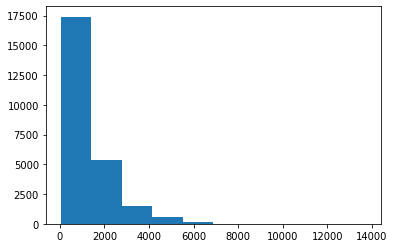

In [516]:
plt.hist(len_status)

(array([1.7667e+04, 5.3280e+03, 1.3930e+03, 5.2400e+02, 7.3000e+01,
        8.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  10.,  256.,  502.,  748.,  994., 1240., 1486., 1732., 1978.,
        2224., 2470.]),
 <a list of 10 Patch objects>)

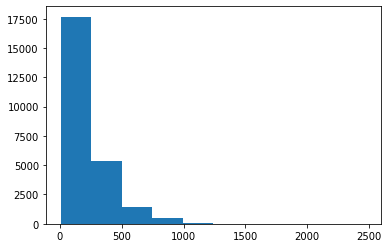

In [517]:
num_words= [len(s.split(' ')) for s in X]
plt.hist(num_words)

# Tvec

In [518]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [520]:
y_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: sentiment, dtype: float64

In [521]:
import warnings

In [522]:
warnings.filterwarnings('ignore')

In [523]:
tvec = TfidfVectorizer()

In [524]:
X_train_tvec = tvec.fit_transform(X_train)

In [525]:
X_test_tvec = tvec.transform(X_test)

In [526]:
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer(lowercase=False)),
    ('lr', LogisticRegression())
])

In [527]:
pipe_params2 = {'tvec__max_features': [100, 500], 
               'tvec__stop_words':[None, 'english'],
              'tvec__ngram_range': [(1,1), (1,2)]}

In [528]:
gs2 = GridSearchCV(pipe2, # what object are we optimizing?
                  pipe_params2, # what parameters values are we searching?
                  cv=3) # 3-fold cross-validation.

In [529]:
gs2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [530]:
print(gs2.best_score_)

0.8225677759318821


## Logistic regression

In [531]:
X_train = tvec.fit_transform(X_train)

X_test = tvec.transform(X_test)

In [532]:
# Instantiate logistic regression.
lr = LogisticRegression()

# Fit logistic regression.
lr.fit(X_train, y_train)

# Evaluate logistic regression.
print(f'Training Score: {lr.score(X_train, y_train)}')
print(f'Testing Score: {lr.score(X_test, y_test)}')

Training Score: 0.933134328358209
Testing Score: 0.8887272727272727


# Submission

In [533]:
test = pd.read_csv("./data/testData.tsv", header=0, delimiter="\t", \
                   quoting=3 )

In [534]:
test.shape

(25000, 2)

In [535]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [536]:
text_X= test['review']

In [537]:
text_X= tvec.transform(text_X)

In [538]:
lr = LogisticRegression()

# Fit logistic regression.
lr.fit(X_train_tvec, y_train)

# Evaluate logistic regression.
print(f'Training Score: {lr.score(X_train_tvec, y_train)}')
print(f'Testing Score: {lr.score(X_test_tvec, y_test)}')

Training Score: 0.933134328358209
Testing Score: 0.8887272727272727


In [539]:
tvec_test_score  = lr.score(X_test_tvec, y_test)

In [540]:
preds = lr.predict(X_test_tvec)
preds[:10]

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [541]:
logreg = LogisticRegression()

In [542]:
logreg.fit(X_train_tvec, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [543]:
preds = logreg.predict(text_X)

In [544]:
preds.shape

(25000,)

# Submission

In [545]:
submission = pd.DataFrame(test['id'])

In [546]:
submission['sentiment']= preds

In [547]:
submission.shape

(25000, 2)

In [548]:
submission.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",0
4,"""12128_7""",1


In [549]:
submission.to_csv('Tvec_log_submission', index=False, quoting=3)

## Done!